In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

In [17]:
from sklearn.preprocessing import MinMaxScaler

# 1. Load data

In [18]:
# data set from https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation

In [19]:
df = pd.read_csv("bank_transactions.csv")

In [20]:
df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


# 2. Check data quarity

In [21]:
# check data type

In [22]:
df.info() # date format much be adjust

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [23]:
# check na

In [24]:
df.shape

(1048567, 9)

In [25]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [26]:
# check distinct value each columns (number of transactionno much equal to df.shape[0], if not, some duplicate problem occur)

In [27]:
df['TransactionID'].unique()

array(['T1', 'T2', 'T3', ..., 'T1048565', 'T1048566', 'T1048567'],
      dtype=object)

In [28]:
df['TransactionID'].nunique()

1048567

In [29]:
for i in df.columns:
    print('Columns name: ', i)
    print('Unique value: ', df[i].unique())
    print('Count unique value: ', df[i].nunique())
    print('-'*10)

Columns name:  TransactionID
Unique value:  ['T1' 'T2' 'T3' ... 'T1048565' 'T1048566' 'T1048567']
Count unique value:  1048567
----------
Columns name:  CustomerID
Unique value:  ['C5841053' 'C2142763' 'C4417068' ... 'C8020229' 'C6459278' 'C6420483']
Count unique value:  884265
----------
Columns name:  CustomerDOB
Unique value:  ['10/1/94' '4/4/57' '26/11/96' ... '18/7/65' '15/5/42' '24/10/44']
Count unique value:  17254
----------
Columns name:  CustGender
Unique value:  ['F' 'M' nan 'T']
Count unique value:  3
----------
Columns name:  CustLocation
Unique value:  ['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' ... 'KARANJIA'
 'NR HERITAGE FRESH HYDERABAD' 'IMPERIA THANE WEST']
Count unique value:  9355
----------
Columns name:  CustAccountBalance
Unique value:  [ 17819.05   2270.69  17874.44 ... 182889.37  15037.89   1002.96]
Count unique value:  161328
----------
Columns name:  TransactionDate
Unique value:  ['2/8/16' '1/8/16' '3/8/16' '5/8/16' '4/8/16' '6/8/16' '9/8/16' '8/8/16'
 '12/8/16' '7/8/

In [30]:
# date format will be a problem in our analysis

# 3. Data transformation

In [31]:
# *** idea ***

# age
# sex
# part
# avg txn time
# avg ticket size
# current aum (CustAccountBalance)
# no txn/acc age month as no txn per motnh

In [32]:
#  #   Column                 Non-Null Count   Dtype  
# ---  ------                 --------------   -----  
#  0   CustomerID             879358 non-null  object 
#  1   Age                    839081 non-null  float64
#  2   Sex                    839081 non-null  float64
#  3   BigCity                839081 non-null  float64
#  4   TransactionTimeMinute  839081 non-null  float64
#  5   TicketSize             839081 non-null  float64
#  6   BalanceSize            839081 non-null  float64
#  7   NoTransaction          839081 non-null  float64

missing value

In [33]:
df.dropna(inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


customer ID

In [35]:
distinct_customers = df['CustomerID'].unique()
distinct_customers_df = pd.DataFrame({'CustomerID': distinct_customers})

In [36]:
distinct_customers_df

,CustomerID
0,C5841053
1,C2142763
2,C4417068
3,C5342380
4,C9031234
...,...
879353,C5028150
879354,C1034220
879355,C8020229
879356,C6459278


age

In [37]:
df.shape

(1041614, 9)

In [38]:
df[['day', 'month', 'year']] = df['CustomerDOB'].str.split('/', expand=True)

In [39]:
df['year'] = df['year'].astype(int)

In [40]:
print(df['year'].min(), df['year'].max())

0 1800


In [41]:
df_for_age = df[df['year'] <= 99]

In [42]:
df_for_age.shape

(985322, 12)

In [43]:
df_for_age['Age'] = 2016 - (1900+df_for_age['year'])

C:\Users\peerapat\AppData\Local\Temp/ipykernel_18688/39089936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_age['Age'] = 2016 - (1900+df_for_age['year'])


In [44]:
df_for_age

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),day,month,year,Age
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,10,1,94,22
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,4,4,57,59
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,26,11,96,20
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0,14,9,73,43
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,24,3,88,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0,8,4,90,26
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0,20,2,92,24
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0,18,5,89,27
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,30,8,78,38


In [45]:
customers_age_df = df_for_age.groupby('CustomerID')['Age'].max().reset_index()
customers_age_df.columns = ['CustomerID', 'Age']

In [46]:
customers_age_df

,CustomerID,Age
0,C1010011,33
1,C1010012,22
2,C1010014,32
3,C1010018,26
4,C1010024,51
...,...,...
839076,C9099836,26
839077,C9099877,20
839078,C9099919,23
839079,C9099941,21


sex

In [47]:
df['CustGender'] = df['CustGender'].apply(lambda x: 1 if x == 'M' else 0)

In [48]:
customers_sex_df = df.groupby('CustomerID')['CustGender'].max().reset_index()
customers_sex_df.columns = ['CustomerID', 'Sex']

In [49]:
customers_sex_df

,CustomerID,Sex
0,C1010011,1
1,C1010012,1
2,C1010014,1
3,C1010018,0
4,C1010024,1
...,...,...
879353,C9099836,1
879354,C9099877,1
879355,C9099919,1
879356,C9099941,1


city name

In [50]:
# top 10 most populous cities in India:

# Mumbai, Maharashtra
# Delhi, Delhi (NCT)
# Bangalore, Karnataka
# Hyderabad, Telangana
# Ahmedabad, Gujarat
# Chennai, Tamil Nadu
# Kolkata, West Bengal
# Surat, Gujarat
# Pune, Maharashtra
# Jaipur, Rajasthan

In [51]:
df['CustLocation']

0             JAMSHEDPUR
1                JHAJJAR
2                 MUMBAI
3                 MUMBAI
4            NAVI MUMBAI
               ...      
1048562        NEW DELHI
1048563           NASHIK
1048564        HYDERABAD
1048565    VISAKHAPATNAM
1048566             PUNE
Name: CustLocation, Length: 1041614, dtype: object

In [52]:
big_cities_india = ['MUMBAI', 'DELHI', 'BANGALORE', 'HYDERABAD', 'AHMEDABAD', 'CHENNAI', 'KOLKATA', 'SURAT', 'PUNE', 'JAIPUR']

In [53]:
def flag_big_city(city):
    if city.upper() in big_cities_india:
        return 1
    else:
        return 0

In [54]:
# Apply the function to create the 'flag_big_city' column
df['flag_big_city'] = df['CustLocation'].apply(flag_big_city)

In [55]:
customers_big_city_df = df.groupby('CustomerID')['flag_big_city'].max().reset_index()
customers_big_city_df.columns = ['CustomerID', 'BigCity']

In [56]:
customers_big_city_df

,CustomerID,BigCity
0,C1010011,0
1,C1010012,1
2,C1010014,1
3,C1010018,0
4,C1010024,1
...,...,...
879353,C9099836,0
879354,C9099877,1
879355,C9099919,0
879356,C9099941,1


avg txn time

In [57]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),day,month,year,flag_big_city
0,T1,C5841053,10/1/94,0,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,10,1,94,0
1,T2,C2142763,4/4/57,1,JHAJJAR,2270.69,2/8/16,141858,27999.0,4,4,57,0
2,T3,C4417068,26/11/96,0,MUMBAI,17874.44,2/8/16,142712,459.0,26,11,96,1
3,T4,C5342380,14/9/73,0,MUMBAI,866503.21,2/8/16,142714,2060.0,14,9,73,1
4,T5,C9031234,24/3/88,0,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,24,3,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,1,NEW DELHI,7635.19,18/9/16,184824,799.0,8,4,90,0
1048563,T1048564,C6459278,20/2/92,1,NASHIK,27311.42,18/9/16,183734,460.0,20,2,92,0
1048564,T1048565,C6412354,18/5/89,1,HYDERABAD,221757.06,18/9/16,183313,770.0,18,5,89,1
1048565,T1048566,C6420483,30/8/78,1,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,30,8,78,0


In [58]:
print(df['TransactionTime'].min(), df['TransactionTime'].max(), df['TransactionTime'].mean())

0 235959 157122.11637804407


In [59]:
customers_txn_time_df = df.groupby('CustomerID')['TransactionTime'].mean().reset_index()
customers_txn_time_df.columns = ['CustomerID', 'TransactionTimeMinute']

In [60]:
customers_txn_time_df['TransactionTimeMinute'] = customers_txn_time_df['TransactionTimeMinute']/(60*60)

In [61]:
customers_txn_time_df

,CustomerID,TransactionTimeMinute
0,C1010011,18.755833
1,C1010012,56.780278
2,C1010014,52.049444
3,C1010018,47.292778
4,C1010024,39.195278
...,...,...
879353,C9099836,1.422778
879354,C9099877,33.404167
879355,C9099919,34.036944
879356,C9099941,59.367222


ticket size

In [62]:
customers_ticket_size = df.groupby('CustomerID')['TransactionAmount (INR)'].mean().reset_index()
customers_ticket_size.columns = ['CustomerID', 'TicketSize']

In [63]:
customers_ticket_size

,CustomerID,TicketSize
0,C1010011,2553.0
1,C1010012,1499.0
2,C1010014,727.5
3,C1010018,30.0
4,C1010024,5000.0
...,...,...
879353,C9099836,691.0
879354,C9099877,222.0
879355,C9099919,126.0
879356,C9099941,50.0


balance

In [64]:
customers_balance_df = df.groupby('CustomerID')['CustAccountBalance'].mean().reset_index()
customers_balance_df.columns = ['CustomerID', 'BalanceSize']

In [65]:
customers_balance_df

,CustomerID,BalanceSize
0,C1010011,76340.635
1,C1010012,24204.490
2,C1010014,100112.950
3,C1010018,496.180
4,C1010024,87058.650
...,...,...
879353,C9099836,133067.230
879354,C9099877,96063.460
879355,C9099919,5559.750
879356,C9099941,35295.920


no txn

In [66]:
customers_no_txn_df = df.groupby('CustomerID')['TransactionID'].count().reset_index()
customers_no_txn_df.columns = ['CustomerID', 'NoTransaction']

In [67]:
customers_no_txn_df

,CustomerID,NoTransaction
0,C1010011,2
1,C1010012,1
2,C1010014,2
3,C1010018,1
4,C1010024,1
...,...,...
879353,C9099836,1
879354,C9099877,1
879355,C9099919,1
879356,C9099941,1


In [68]:
# distinct_customers_df
# customers_age_df
# customers_sex_df
# customers_big_city_df
# customers_txn_time_df
# customers_ticket_size
# customers_balance_df
# customers_no_txn_df

In [69]:
df_transformed = distinct_customers_df
df_transformed = pd.merge(df_transformed, customers_age_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_sex_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_big_city_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_txn_time_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_ticket_size, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_balance_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_no_txn_df, on='CustomerID', how='left')

In [70]:
df_transformed

,CustomerID,Age,Sex,BigCity,TransactionTimeMinute,TicketSize,BalanceSize,NoTransaction
0,C5841053,22.0,0,0,39.779722,25.0,17819.050,1
1,C2142763,59.0,1,0,39.405000,27999.0,2270.690,1
2,C4417068,20.0,0,1,39.642222,459.0,17874.440,1
3,C5342380,43.0,1,1,46.786389,1469.2,434849.495,2
4,C9031234,28.0,0,0,50.321111,1762.5,6714.430,1
...,...,...,...,...,...,...,...,...
879353,C5028150,36.0,1,1,51.286667,3000.0,464.870,1
879354,C1034220,24.0,1,1,51.315000,1500.0,1212.700,1
879355,C8020229,26.0,1,0,51.340000,799.0,7635.190,1
879356,C6459278,24.0,1,0,51.037222,460.0,27311.420,1


In [71]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879358 entries, 0 to 879357
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CustomerID             879358 non-null  object 
 1   Age                    839081 non-null  float64
 2   Sex                    879358 non-null  int64  
 3   BigCity                879358 non-null  int64  
 4   TransactionTimeMinute  879358 non-null  float64
 5   TicketSize             879358 non-null  float64
 6   BalanceSize            879358 non-null  float64
 7   NoTransaction          879358 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 60.4+ MB


fill age na

In [72]:
mean_age = df_transformed['Age'].mean()

In [73]:
df_transformed['Age'].fillna(mean_age, inplace=True)

In [74]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879358 entries, 0 to 879357
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CustomerID             879358 non-null  object 
 1   Age                    879358 non-null  float64
 2   Sex                    879358 non-null  int64  
 3   BigCity                879358 non-null  int64  
 4   TransactionTimeMinute  879358 non-null  float64
 5   TicketSize             879358 non-null  float64
 6   BalanceSize            879358 non-null  float64
 7   NoTransaction          879358 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 60.4+ MB


In [75]:
df = df_transformed

In [82]:
df.drop('CustomerID', axis=1, inplace=True)

# 4. EDA

In [76]:
# calculate correlation matrix
corr = df.corr()

In [77]:
df.describe()

,Age,Sex,BigCity,TransactionTimeMinute,TicketSize,BalanceSize,NoTransaction
count,879358.000000,879358.000000,879358.000000,879358.000000,8.793580e+05,8.793580e+05,879358.000000
mean,31.866631,0.763298,0.405099,43.649628,1.566794e+03,1.147150e+05,1.184516
std,9.207944,0.425058,0.490911,13.630718,6.433248e+03,8.010838e+05,0.448954
min,17.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,26.000000,1.000000,0.000000,34.842778,1.908725e+02,5.591270e+03,1.000000
50%,30.000000,1.000000,0.000000,45.430000,5.000000e+02,1.866578e+04,1.000000
75%,35.000000,1.000000,1.000000,54.088611,1.241000e+03,6.154196e+04,1.000000
max,116.000000,1.000000,1.000000,65.544167,1.560035e+06,1.150355e+08,6.000000


<AxesSubplot:>

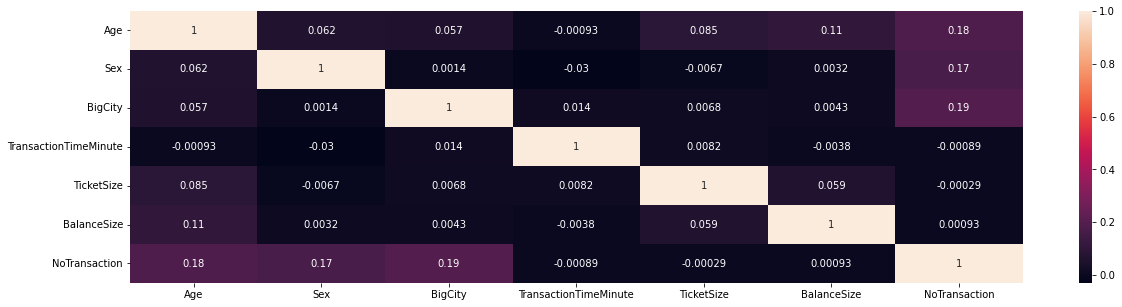

In [78]:
# create figure and axes
fig, ax = plt.subplots(figsize=(20, 5))
# plot correlation matrix
sns.heatmap(corr, annot=True, ax=ax)

# 5. Model

In [83]:
# Import libary for K-means model
from sklearn.cluster import KMeans

In [84]:
scaler = MinMaxScaler()

In [85]:
df_scaled = scaler.fit_transform(df)

In [86]:
df_scaled

array([[5.05050505e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.60252816e-05, 1.54900450e-04, 0.00000000e+00],
       [4.24242424e-01, 1.00000000e+00, 0.00000000e+00, ...,
        1.79476744e-02, 1.97390379e-05, 0.00000000e+00],
       [3.03030303e-02, 0.00000000e+00, 1.00000000e+00, ...,
        2.94224170e-04, 1.55381954e-04, 0.00000000e+00],
       ...,
       [9.09090909e-02, 1.00000000e+00, 0.00000000e+00, ...,
        5.12168000e-04, 6.63724705e-05, 0.00000000e+00],
       [7.07070707e-02, 1.00000000e+00, 0.00000000e+00, ...,
        2.94865181e-04, 2.37417329e-04, 0.00000000e+00],
       [2.12121212e-01, 1.00000000e+00, 0.00000000e+00, ...,
        6.41011263e-04, 8.79543309e-05, 0.00000000e+00]])

In [87]:
sse = [] # sum of squared errors
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    # Calculate the sum of squared errors for each model
    sse.append(km.inertia_)

In [88]:
sse

[423582.35744904174,
 211366.279330373,
 102297.22459744525,
 52176.43241733244,
 40030.797930991495,
 32576.55722313867,
 29293.703528834863,
 26263.067991006264,
 23438.877978649245,
 21324.354485889548]

In [89]:
list_k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

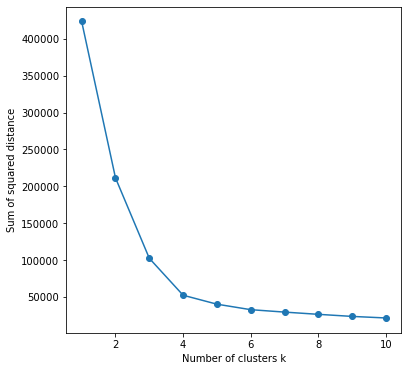

In [90]:
# 4. Plot an elbow graph to help decide the optimal number of clusters
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.show()

In [120]:
# In the elbow method, K = 5 appears to be a promising choice,
# yet we will evaluate values of 4, 5, and 6 to determine the most contextually relevant option from a business perspective.

In [121]:
# K = 4

In [122]:
km_4 = KMeans(n_clusters=4)

In [123]:
km_4.fit(df_scaled)

KMeans(n_clusters=4)

In [124]:
df['km_4'] = km_4.predict(df_scaled)

In [125]:
df

,Age,Sex,BigCity,TransactionTimeMinute,TicketSize,BalanceSize,NoTransaction,km_4
0,22.0,0,0,39.779722,25.0,17819.050,1,2
1,59.0,1,0,39.405000,27999.0,2270.690,1,1
2,20.0,0,1,39.642222,459.0,17874.440,1,3
3,43.0,1,1,46.786389,1469.2,434849.495,2,0
4,28.0,0,0,50.321111,1762.5,6714.430,1,2
...,...,...,...,...,...,...,...,...
879353,36.0,1,1,51.286667,3000.0,464.870,1,0
879354,24.0,1,1,51.315000,1500.0,1212.700,1,0
879355,26.0,1,0,51.340000,799.0,7635.190,1,1
879356,24.0,1,0,51.037222,460.0,27311.420,1,1


In [140]:
# Group by 'km_4' and calculate the average for each group
grouped = df.groupby('km_4').mean()

# Pivot the result to have 'km_4' values as columns
pivot_result = grouped.pivot_table(index=None, columns='km_4')

In [141]:
grouped = df.groupby('km_4').count()
pivot_result2 = grouped.pivot_table(index=None, columns='km_4')

In [142]:
pivot_result

km_4,0,1,2,3
Age,32.932420,31.672511,30.653708,31.127935
BalanceSize,121512.315040,112508.162380,109794.062256,110448.322763
BigCity,1.000000,0.000000,0.000000,1.000000
NoTransaction,1.354916,1.139888,1.027040,1.077138
Sex,1.000000,1.000000,0.000000,0.000000
TicketSize,1597.267205,1505.809306,1611.175622,1692.120499
TransactionTimeMinute,43.694775,43.235677,44.307983,44.496732


In [143]:
pivot_result2

km_4,0,1,2,3
Age,272157,399055,124076,84070
BalanceSize,272157,399055,124076,84070
BigCity,272157,399055,124076,84070
NoTransaction,272157,399055,124076,84070
Sex,272157,399055,124076,84070
TicketSize,272157,399055,124076,84070
TransactionTimeMinute,272157,399055,124076,84070


In [115]:
***

SyntaxError: invalid syntax (Temp/ipykernel_18688/2938429678.py, line 1)

In [ ]:
df

In [ ]:
**